In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
print

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [3]:
f=open('WhatsApp Chat with Ahan Bandyopadhyay Senior.txt','r',encoding='utf-8')

In [4]:
data=f.read()

In [5]:
print(data)

13/02/24, 2:56 pm - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
04/05/24, 11:53 pm - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
08/05/24, 12:30 pm - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
26/05/24, 11:45 am - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
04/06/24, 7:15 am - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
16/06/24, 8:45 am - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
08/07/24, 3:09 pm - sathwika: Hi sir


In [6]:
pattern=r"\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s[ap]m\s-\s"

In [7]:
messages=re.split(pattern,data)[1:]
len(messages)

1044

In [8]:
dates=re.findall(pattern,data)
dates

['13/02/24, 2:56\u202fpm - ',
 '04/05/24, 11:53\u202fpm - ',
 '08/05/24, 12:30\u202fpm - ',
 '26/05/24, 11:45\u202fam - ',
 '04/06/24, 7:15\u202fam - ',
 '16/06/24, 8:45\u202fam - ',
 '08/07/24, 3:09\u202fpm - ',
 '08/07/24, 3:10\u202fpm - ',
 '08/07/24, 3:26\u202fpm - ',
 '08/07/24, 3:26\u202fpm - ',
 '08/07/24, 3:27\u202fpm - ',
 '08/07/24, 3:27\u202fpm - ',
 '19/07/24, 12:28\u202fpm - ',
 '19/07/24, 12:28\u202fpm - ',
 '19/07/24, 12:31\u202fpm - ',
 '19/07/24, 12:31\u202fpm - ',
 '19/07/24, 12:31\u202fpm - ',
 '19/07/24, 12:31\u202fpm - ',
 '19/07/24, 12:31\u202fpm - ',
 '19/07/24, 12:31\u202fpm - ',
 '19/07/24, 12:32\u202fpm - ',
 '19/07/24, 12:32\u202fpm - ',
 '19/07/24, 12:32\u202fpm - ',
 '19/07/24, 12:33\u202fpm - ',
 '19/07/24, 12:34\u202fpm - ',
 '19/07/24, 12:34\u202fpm - ',
 '26/07/24, 9:43\u202fam - ',
 '26/07/24, 9:44\u202fam - ',
 '26/07/24, 12:38\u202fpm - ',
 '26/07/24, 1:18\u202fpm - ',
 '26/07/24, 1:18\u202fpm - ',
 '26/07/24, 1:18\u202fpm - ',
 '26/07/24, 2:29\u202f

In [9]:
df=pd.DataFrame({'user_message':messages,'message_date':dates})
df["message_date"] = df["message_date"].str.replace("\u202F", " ", regex=True)  # Replace narrow no-break space with regular space
# Convert to datetime (ignoring the trailing '- ')
df["message_date"] = pd.to_datetime(df["message_date"].str.rstrip(" -"), format="%d/%m/%y, %I:%M %p")
df.rename(columns={'message_date':'date'},inplace=True)
df.head()

,user_message,date
0,Messages and calls are end-to-end encrypted. N...,2024-02-13 14:56:00
1,Messages and calls are end-to-end encrypted. N...,2024-05-04 23:53:00
2,Messages and calls are end-to-end encrypted. N...,2024-05-08 12:30:00
3,Messages and calls are end-to-end encrypted. N...,2024-05-26 11:45:00
4,Messages and calls are end-to-end encrypted. N...,2024-06-04 07:15:00


In [10]:
#separate users and messages
users=[]
messages=[]
for message in df['user_message']:
    entry=re.split(r'([\w\W]+?):\s',message)
    if entry[1:]:
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('group_notification')
        messages.append(entry[0])

df['user']=users
df['message']=messages
df.drop(columns=['user_message'],inplace=True)
df.head()

,date,user,message
0,2024-02-13 14:56:00,group_notification,Messages and calls are end-to-end encrypted. N...
1,2024-05-04 23:53:00,group_notification,Messages and calls are end-to-end encrypted. N...
2,2024-05-08 12:30:00,group_notification,Messages and calls are end-to-end encrypted. N...
3,2024-05-26 11:45:00,group_notification,Messages and calls are end-to-end encrypted. N...
4,2024-06-04 07:15:00,group_notification,Messages and calls are end-to-end encrypted. N...


In [11]:
df['year']=df['date'].dt.year

In [12]:
df.head()

,date,user,message,year
0,2024-02-13 14:56:00,group_notification,Messages and calls are end-to-end encrypted. N...,2024
1,2024-05-04 23:53:00,group_notification,Messages and calls are end-to-end encrypted. N...,2024
2,2024-05-08 12:30:00,group_notification,Messages and calls are end-to-end encrypted. N...,2024
3,2024-05-26 11:45:00,group_notification,Messages and calls are end-to-end encrypted. N...,2024
4,2024-06-04 07:15:00,group_notification,Messages and calls are end-to-end encrypted. N...,2024


In [13]:
df['month']=df['date'].dt.month_name()

In [14]:
df['day']=df['date'].dt.day

In [15]:
df['hour']=df['date'].dt.hour

In [16]:
df['minute']=df['date'].dt.minute

In [23]:
df[200:300]

,date,user,message,year,month,day,hour,minute
200,2024-09-17 22:27:00,Ahan Bandyopadhyay Senior,No issue\n,2024,September,17,22,27
201,2024-09-17 22:43:00,sathwika,Miss ambrini mentioned to me that hiring would...,2024,September,17,22,43
202,2024-09-17 22:44:00,Ahan Bandyopadhyay Senior,Ouu\n,2024,September,17,22,44
203,2024-09-19 11:31:00,Ahan Bandyopadhyay Senior,null\n,2024,September,19,11,31
204,2024-09-21 23:02:00,Ahan Bandyopadhyay Senior,koi ek bhi form bhare toh batana yr\n,2024,September,21,23,2
...,...,...,...,...,...,...,...,...
295,2024-09-22 00:33:00,Ahan Bandyopadhyay Senior,u guys get placed in hyd\n,2024,September,22,0,33
296,2024-09-22 00:33:00,Ahan Bandyopadhyay Senior,best deal\n,2024,September,22,0,33
297,2024-09-22 00:33:00,sathwika,Definitely not in unistring\n,2024,September,22,0,33
298,2024-09-22 00:33:00,Ahan Bandyopadhyay Senior,GS service now MS salesforce all diversity hir...,2024,September,22,0,33


In [18]:
words=[]
for message in df['message']:
    words.extend(message.split())

In [19]:
len(words)

6133

In [20]:
df[df['message']=='<Media omitted>\n'].shape[0]

25

In [21]:
df[500:550]


,date,user,message,year,month,day,hour,minute
500,2024-12-20 16:25:00,Ahan Bandyopadhyay Senior,Wlcm to TnP😂\n,2024,December,20,16,25
501,2024-12-20 16:26:00,sathwika,4th year seniors are texting me regarding wayf...,2024,December,20,16,26
502,2024-12-20 16:27:00,Ahan Bandyopadhyay Senior,Tell them the HR team is unresponsive \n\nWill...,2024,December,20,16,27
503,2024-12-20 16:27:00,Ahan Bandyopadhyay Senior,Sbhi 4th yrs ko fwd krdo \nIn case they dm u\n,2024,December,20,16,27
504,2024-12-20 16:29:00,sathwika,Okay sir👍👍\n,2024,December,20,16,29
505,2024-12-22 09:00:00,Ahan Bandyopadhyay Senior,How to Get Addicted to Machine Learning https:...,2024,December,22,9,0
506,2024-12-22 09:08:00,sathwika,Wow!! Thank u sir☺\n,2024,December,22,9,8
507,2025-01-10 17:45:00,sathwika,Hi sir\n,2025,January,10,17,45
508,2025-01-10 17:45:00,sathwika,I have an online assessment on Sunday for uber...,2025,January,10,17,45
509,2025-01-10 17:47:00,sathwika,I just want some tips on copying sir😅\n,2025,January,10,17,47


In [24]:
from urlextract import URLEXTRACT
extractor=URLExtract()
urls=extractor.find_urls("www.gmail.com")

ImportError: cannot import name 'URLEXTRACT' from 'urlextract' (C:\Users\SATHWIKA\AppData\Local\Programs\Python\Python312\Lib\site-packages\urlextract\__init__.py)

In [25]:
links=[]
for message in df['message']:
    print(extractor.find_urls(message))

NameError: name 'extractor' is not defined

In [26]:
x=df['user'].value_counts().head()
x

user
Ahan Bandyopadhyay Senior    647
sathwika                     391
group_notification             6
Name: count, dtype: int64

In [27]:
import matplotlib.pyplot as plt

In [28]:
name=x.index
count=x.values

NameError: name 'ax' is not defined

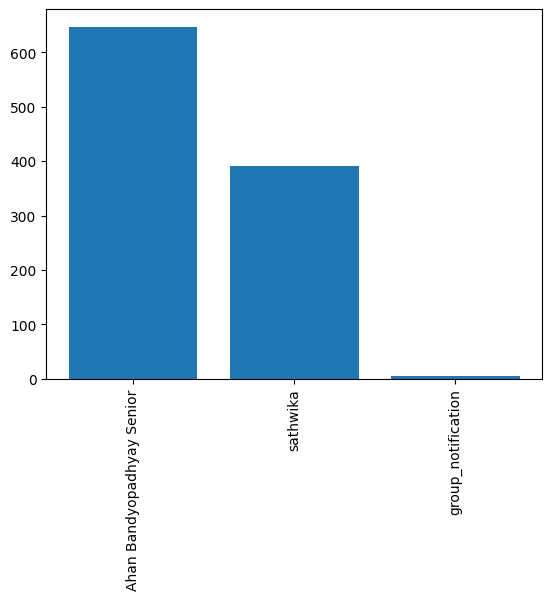

In [29]:
plt.bar(name,count)
plt.xticks(rotation='vertical')
ax.set_xticklabels(x.index, rotation=45, ha='right', color='red')

plt.show()

In [30]:
round((df['user'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns={'user':'Name','count':'percent'})

,Name,percent
0,Ahan Bandyopadhyay Senior,61.97
1,sathwika,37.45
2,group_notification,0.57


In [31]:
temp=df[df['user']!='group_notification']
temp=temp[temp['message']!='<Media omitted>\n']

In [32]:
f=open('stop_hinglish.txt','r')
stop_words=f.read()
print(stop_words)

.
..
...
?
-
--
+91
1
2
3
4
5
6
7
8
9
0
a
aadi
aaj
aap
aapne
aata
aati
aaya
aaye
ab
abbe
abbey
abe
abhi
able
about
above
accha
according
accordingly
acha
achcha
across
actually
after
afterwards
again
against
agar
ain
aint
ain't
aisa
aise
aisi
alag
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
andar
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
ap
apan
apart
apna
apnaa
apne
apni
appear
are
aren
arent
aren't
around
arre
as
aside
ask
asking
at
aur
avum
aya
aye
baad
baar
bad
bahut
bana
banae
banai
banao
banaya
banaye
banayi
banda
bande
bandi
bane
bani
bas
bata
batao
bc
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
below
beside
besides
best
better
between
beyond
bhai
bheetar
bhi
bhitar
bht
bilkul
bohot
bol
bola
bole
boli
bolo
bolta
bolte
bolti
both
brief
bro
btw
but
by
came
can
cannot
cant
can't
cause
causes
certain
certainly
chahiye
chaiye
chal
chalega
chhaiye
clearly
c'mon
com
come
comes
could


In [ ]:
words=[]
for message in temp['message']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)

In [ ]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

In [ ]:
!pip install emoji

In [ ]:
import emoji

In [ ]:
emojis=[]
for message in df['message']:
    emojis.extend([c for c in message if emoji.is_emoji(c)])

In [ ]:
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

In [ ]:
plt.bar(emoji_df[0].head(),emoji_df[1].head())

In [ ]:
df['month_num']=df['date'].dt.month

In [ ]:
df

In [35]:
timeline=df.groupby(['year','month_num','month']).count()['message'].reset_index()

KeyError: 'month_num'

In [ ]:
timeline

In [ ]:
time=[]
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i] + "-" + str(timeline['year'][i]))

In [ ]:
timeline['time']=time

In [33]:
timeline

NameError: name 'timeline' is not defined

In [34]:
plt.plot(timeline['time'],timeline['message'])

NameError: name 'timeline' is not defined

In [36]:
print(timeline)  # This should print the DataFrame. If not, it's not initialized.


NameError: name 'timeline' is not defined

In [37]:
df['only_date']=df['date'].dt.date

In [40]:
daily_timeline=df.groupby('only_date').count()['message'].reset_index()

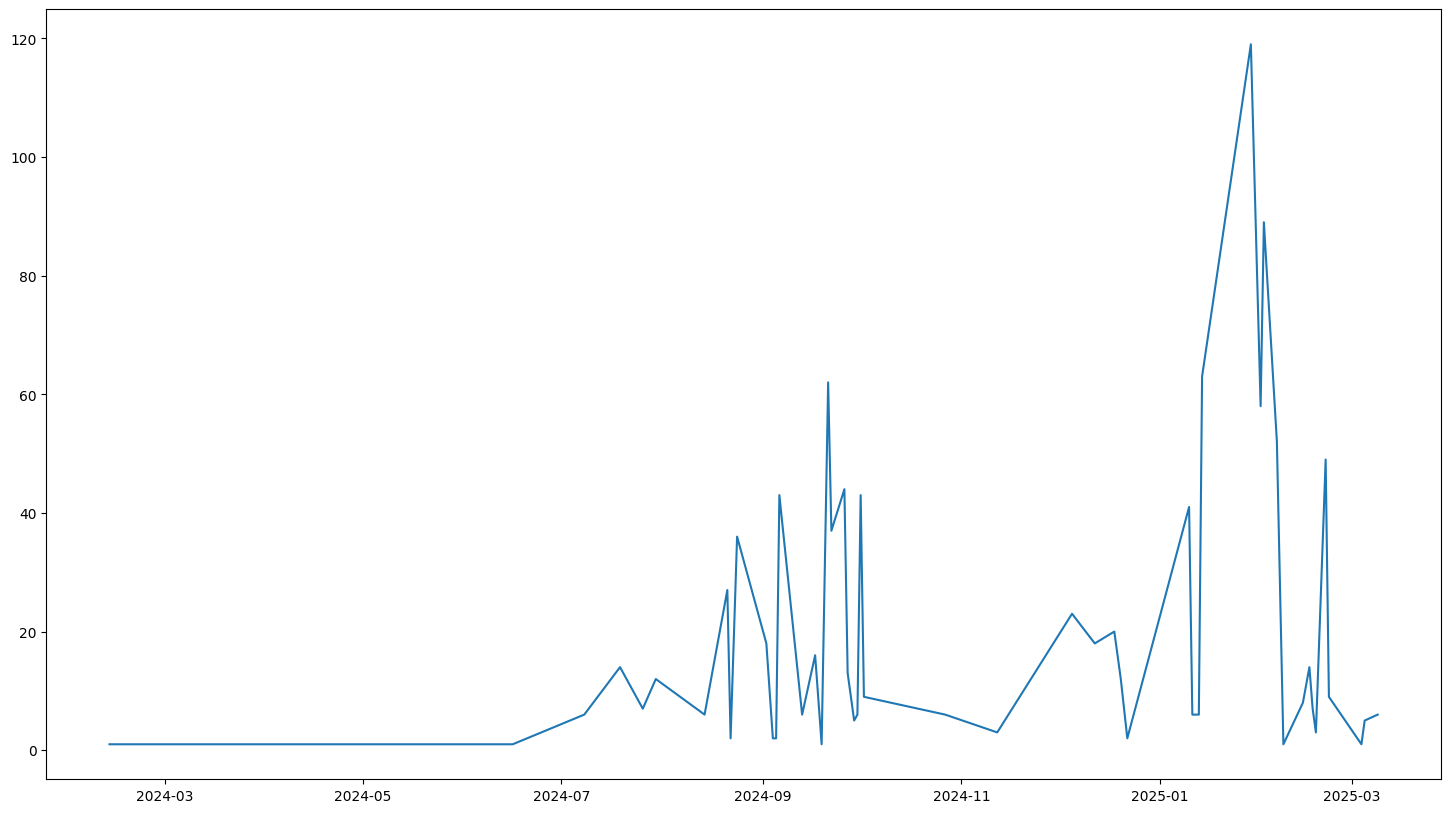

In [41]:
plt.figure(figsize=(18,10))
plt.plot(daily_timeline['only_date'],daily_timeline['message'])

In [42]:
df['day_name']=df['date'].dt.day_name()

In [43]:
df['day_name'].value_counts()

day_name
Friday       193
Wednesday    189
Saturday     173
Sunday       161
Tuesday      143
Thursday     142
Monday        43
Name: count, dtype: int64

In [44]:
df.head()

,date,user,message,year,month,day,hour,minute,only_date,day_name
0,2024-02-13 14:56:00,group_notification,Messages and calls are end-to-end encrypted. N...,2024,February,13,14,56,2024-02-13,Tuesday
1,2024-05-04 23:53:00,group_notification,Messages and calls are end-to-end encrypted. N...,2024,May,4,23,53,2024-05-04,Saturday
2,2024-05-08 12:30:00,group_notification,Messages and calls are end-to-end encrypted. N...,2024,May,8,12,30,2024-05-08,Wednesday
3,2024-05-26 11:45:00,group_notification,Messages and calls are end-to-end encrypted. N...,2024,May,26,11,45,2024-05-26,Sunday
4,2024-06-04 07:15:00,group_notification,Messages and calls are end-to-end encrypted. N...,2024,June,4,7,15,2024-06-04,Tuesday
